In [31]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout, write_dot
import queue

In [67]:

class Node:
  def __init__(self, data, left=None, right=None):
    self.k = data
    self.left = left
    self.right = right
    self.parent = None
    self.color = 'red'

    if left:
      left.parent = self
    if right:
      right.parent = self

##############

class RB_Tree:
  def __init__(self): 
    nil_node = Node(-1)
    nil_node.color = 'black'
    self.NIL = nil_node
    self.root = self.NIL

  def left_rotate(self, x):
    y = x.right
    x.right = y.left
    if y.left != self.NIL:
      y.left.parent = x
    y.parent = x.parent
    if x.parent == self.NIL: 
      self.root = y
    elif x == x.parent.left: 
      x.parent.left = y
    else: #x is right 
      x.parent.right = y
    
    y.left = x
    x.parent = y

  def right_rotate(self, x):
    y = x.left
    x.left = y.right
    if y.right != self.NIL:
      y.right.parent = x
    y.parent = x.parent
    if x.parent == self.NIL: 
      self.root = y
    elif x == x.parent.right: 
      x.parent.right = y
    else: #x is left 
      x.parent.left = y
    y.right = x
    x.parent = y

  def insert(self, z):
    y = self.NIL 
    x = self.root

    while x != self.NIL:
      y = x
      if z.k < x.k:
        x = x.left
      else:
        x = x.right

    z.parent = y

    if y == self.NIL:
      self.root = z
      self.root.parent = self.NIL

    elif z.k < y.k: 
      y.left = z
    else:
      y.right = z

    #adding NIL to maintain attributes later on
    z.right = self.NIL
    z.left = self.NIL

    self.insert_fixup(z)

  def insert_fixup(self, z):
    
    while z.parent.color == 'red':

      if z.parent == z.parent.parent.left: #z.parent is the left child

        y = z.parent.parent.right #stryj

        if y.color == 'red': #case 1
          z.parent.color = 'black'
          y.color = 'black'
          z.parent.parent.color = 'red'
          z = z.parent.parent

        else:
          if z == z.parent.right: #case2
            z = z.parent 
            self.left_rotate(z)

          #case3
          z.parent.color = 'black' 
          z.parent.parent.color = 'red' 
          self.right_rotate(z.parent.parent)

      else: #z.parent is the right child
        y = z.parent.parent.left 

        if y.color == 'red':
          z.parent.color = 'black'
          y.color = 'black'
          z.parent.parent.color = 'black'
          z = z.parent.parent

        else:
          if z == z.parent.left:
            z = z.parent 
            self.right_rotate(z)

          z.parent.color = 'black' 
          z.parent.parent.color = 'red' 
          self.left_rotate(z.parent.parent)

    self.root.color = 'black'

  def minimum(self, x):
    while x.left != self.NIL:
      x = x.left
    return x

  def successor(self, x):
    if x.right != self.NIL:
      return self.minimum(x.right)
    y = x.parent
    while y != self.NIL and x == y.right:
      x = y
      y = y.parent
    return y
  
  def inorder(self, x):
    if x != self.NIL:
      self.inorder(x.left)
      print(x.k)
      self.inorder(x.right)

  def search(self, x, k):
    path = []
    while x != self.NIL and k != x.k:
      path.append(x.k)
      if k < x.k:
        x = x.left
      else:
        x = x.right
    return x, path

  def remove_rb(self, z):
    if z.left == self.NIL or z.right == self.NIL:
      y = z
    else:
      y = self.successor(z)
    if y.left != self.NIL:
      x = y.left
    else:
      x = y.right
    x.parent = y.parent
    if y.parent == self.NIL:
      self.root = x
      self.root.parent = self.NIL
    else:
      if y == y.parent.left:
        y.parent.left = x
      else:
        y.parent.right = x
    if y != z:
      z.k = y.k
    if y.color == 'black':
      self.remove_rb_fixup(x)
  
  def remove_rb_fixup(self, x):

    while x != self.root and x.color == "black":

      if x == x.parent.left:
        w = x.parent.right
  
        if w.color == "red":
          w.color = "black"
          x.parent.color = "red"
          self.left_rotate(x.parent)
          w = x.parent.right
 
        if w.left.color == "black" and w.right.color == "black":
          w.color = "red"
          x = x.parent

        else:
    
          if w.right.color == "black":
            w.left.color = "black"
            w.color = "red"
            self.right_rotate(w)
            w = x.parent.right
          
          w.color = x.parent.color
          x.parent.color = "black"
          w.right.color = "black"
          self.left_rotate(x.parent)
          x = self.root
          # self.root.parent = self.NIL
      else:
        w = x.parent.left 
  
        if w.color == "red":
          w.color = "black"
          x.parent.color = "red"
          self.right_rotate(x.parent)
          w = x.parent.left
 
        if w.right.color == "black" and w.left.color == "black":
          w.color = "red"
          x = x.parent

        else:

          if w.left.color == "black":
            w.right.color = "black"
            w.color = "red"
            self.left_rotate(w)
            w = x.parent.left
          
          w.color = x.parent.color
          x.parent.color = "black"
          w.left.color = "black"
          self.right_rotate(x.parent)
          x = self.root
          # self.root.parent = self.NIL  

    x.color = "black"

  def inorder_nodes(self, x, nodes):
    if x != self.NIL:
      self.inorder(x.left)
      print(x.k)
      nodes.append(x)
      self.inorder(x.right)

      return nodes
    
  def is_colors_ok(self):
    allowed_colors = ['black', 'red']
    q = queue.Queue()
    r = self.root
    q.put(r)
    while True:
      try:
        node = q.get()
        #print("-", node.k)

        if node != self.NIL:
          if node.color not in allowed_colors:
            return False
          if node.left != self.NIL:
             if node.left.color == 'red' and node.color == 'red':
              return False
          if node.right != self.NIL:
            if node.right.color == 'red' and node.color == 'red':
              return False
          
          if node.left.k is None and node.right.k is None:
            if node.color == 'red':
              return False
          
          #if node.right != self.NIL:
          q.put(node.right)
          #if node.left != self.NIL:
          q.put(node.left)
        
        if q.empty():
          break

      except ValueError:
        break
    return True
          
  def check(self, x):

    if x == self.NIL:
      return True, 1
    
    if x.parent == self.NIL and x.color == "red":
      return False, -1
    
    if x.color == 'red':
      for y in [x.left, x.right]:
        if y.color == 'red':
          return False, -1
    
    r, blacks_r = self.check(x.right)
    l, blacks_l = self.check(x.left)

    is_black = 0
    if x.color == "black":
      is_black = 1
    
    return all([l, r, blacks_r == blacks_l]), blacks_r + is_black



In [ ]:
#RB tree - conditions:
#1. every node is either black or red
#2. root is black
#3. every leaf (nil) is black
#4. if node is red, both of his sons are black
#5. for each node, all simple paths from the node to descendant leaves contain the same number of black nodes


In [34]:
def create_RB(data):

  Tree_x = RB_Tree()
  for d in data:
    z = Node(d)
    Tree_x.insert(z)
    
    print(d)
    display(Tree_x.root)
    print("------------")
    
  print("FINAL:")
  #Tree_x.get_adjs()
  root = Tree_x.root
  display(root)

  return Tree_x

In [35]:
#searching connections in tree, subsidiary to display func
def get_adj(node, adj, nodes):
    if node.k is None:
        return
    else:  
        key = node.k
        #print("K: ", key)
        left_son = node.left
        right_son = node.right

        if left_son:
            adj.append([key, left_son.k])
            if nodes.count(node) == 0:
              nodes.append(node)
            get_adj(node.left, adj, nodes)

        if right_son:
            adj.append([key, right_son.k])
            if nodes.count(node) == 0:
              nodes.append(node)
            get_adj(node.right, adj, nodes)

        return adj, nodes

def display(root):
    G = nx.DiGraph()
    adj, nodes_x = get_adj(root, [], [])
    nodes = []
    for a in adj:
        #print("A:", a)
        if -1 not in a:
          #print("AD:", a)
          G.add_edge(str(a[0]), str(a[1]))

    for node in nodes_x:
      #print("N:", node.k)
      G.add_node(str(node.k), typ=node.color)
    
    
    color_map = nx.get_node_attributes(G, "typ")

    #print(color_map)
    #rint()

    for key in color_map:
      if color_map[key] == "black":
        color_map[key] = "grey"
    

    typ_colors = [color_map[key] for key in color_map]

    #print("TC:", typ_colors)
    #print("=================")
    
    write_dot(G,'test.dot')
    #pos = nx.bipartite_layout(G, nodes)
    #pos = nx.spring_layout(G)
    pos = graphviz_layout(G, prog="dot")
    nx.draw_networkx_nodes(G, pos, node_size = 500, node_color=typ_colors)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)
    plt.show()

    return

2


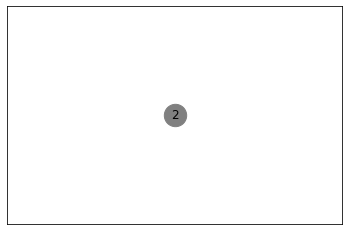

------------
1


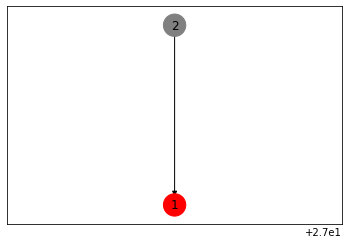

------------
3


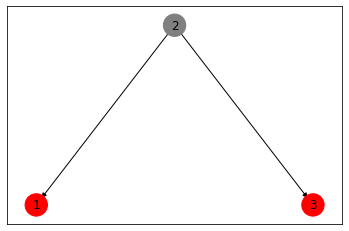

------------
7


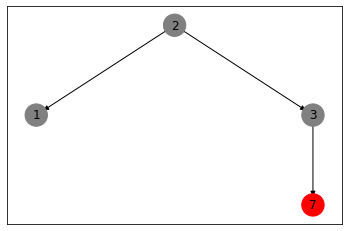

------------
0


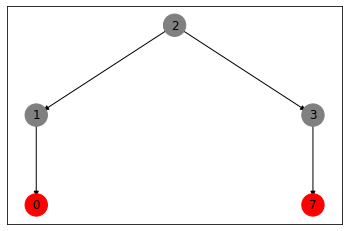

------------
10


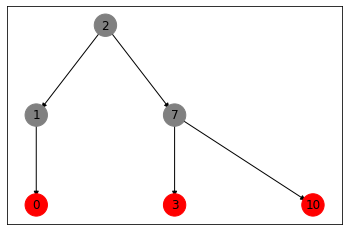

------------
5


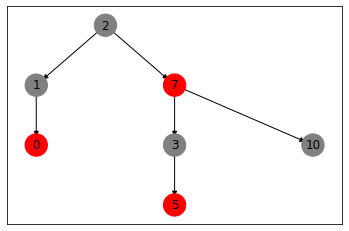

------------
8


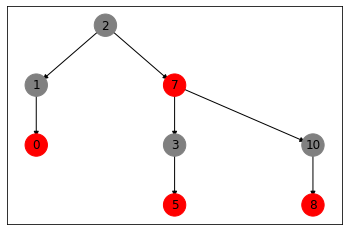

------------
9


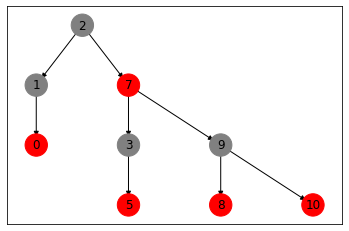

------------
4


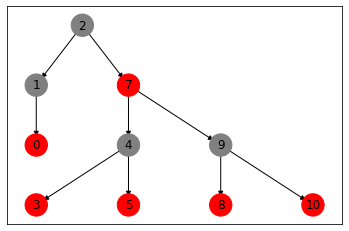

------------
FINAL:


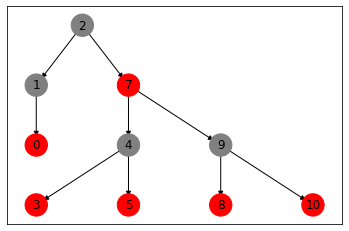

Minimum: 0
10
path: [2, 7, 9]
AFTER REMOVAL: 10


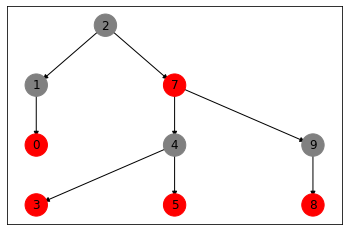

True
True 3


In [68]:
data = [2,1,3,7, 0, 10, 5, 8, 9, 4]

Tree_x = create_RB(data)

#Tree_x.inorder(Tree_x.root)

minimum = Tree_x.minimum(Tree_x.root)
print("Minimum:", minimum.k)

node_x, path = Tree_x.search(Tree_x.root, 10)
print(node_x.k)
print("path:", path)

Tree_x.remove_rb(node_x)

print("AFTER REMOVAL:", node_x.k)
display(Tree_x.root)


aaa = Tree_x.is_colors_ok()
print(aaa)

a, b = Tree_x.check(Tree_x.root)
print(a, b)